### library load

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import base64
from statsmodels.stats.outliers_influence import variance_inflation_factor

## data load

In [2]:
df = pd.read_csv('data\dataset_collaboration_with_survey_scores.csv')
df

,id,project,meeting_number,speaker_number,speech_frequency,total_words,duration,normalized_speech_frequency,speaker_id,next_speaker_id,...,interaction_equality_index,degree_centrality,indegree_centrality,outdegree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,overall_collaboration_score,individual_collaboration_score
0,3_1_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,0,...,0.009704,0.000094,0.000047,0.000047,0.000000,9.518792e-08,0.0,0.000003,-1.0,-1.0
1,3_1_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,1,...,0.009704,0.000094,0.000047,0.000047,0.000000,9.518792e-08,0.0,0.000003,-1.0,-1.0
2,3_1_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,2,...,0.009704,0.000094,0.000047,0.000047,0.000000,9.518792e-08,0.0,0.000003,-1.0,-1.0
3,3_1_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,3,...,0.009704,0.000094,0.000047,0.000047,0.000000,9.518792e-08,0.0,0.000003,-1.0,-1.0
4,3_1_SPEAKER_01,3,1,1,645,8731,1.633333,394.897959,1,0,...,0.009704,0.166808,0.083381,0.083428,0.000051,9.523587e-08,0.0,0.000030,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,4_15_SPEAKER_05,4,15,5,2869,14954,2.383333,1203.776224,5,1,...,0.067964,0.066128,0.032772,0.033356,0.000000,4.989486e-07,0.0,0.000002,NaN,-1.0
473,4_15_SPEAKER_05,4,15,5,2869,14954,2.383333,1203.776224,5,2,...,0.067964,0.066128,0.032772,0.033356,0.000000,4.989486e-07,0.0,0.000002,NaN,-1.0
474,4_15_SPEAKER_05,4,15,5,2869,14954,2.383333,1203.776224,5,3,...,0.067964,0.066128,0.032772,0.033356,0.000000,4.989486e-07,0.0,0.000002,NaN,-1.0
475,4_15_SPEAKER_05,4,15,5,2869,14954,2.383333,1203.776224,5,4,...,0.067964,0.066128,0.032772,0.033356,0.000000,4.989486e-07,0.0,0.000002,NaN,-1.0


In [3]:
# Create necessary columns
df['num_speakers'] = df.groupby(['project', 'meeting_number'])['speaker_number'].transform('nunique')

# Ensure interaction_count column exists
if 'interaction_count' not in df.columns:
    df['interaction_count'] = 0  # Or some appropriate default value

df['normalized_interaction_frequency'] = df['interaction_count'] / df['duration']
df

,id,project,meeting_number,speaker_number,speech_frequency,total_words,duration,normalized_speech_frequency,speaker_id,next_speaker_id,...,outdegree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,overall_collaboration_score,individual_collaboration_score,num_speakers,interaction_count,normalized_interaction_frequency
0,3_1_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,0,...,0.000047,0.000000,9.518792e-08,0.0,0.000003,-1.0,-1.0,4,0,0.0
1,3_1_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,1,...,0.000047,0.000000,9.518792e-08,0.0,0.000003,-1.0,-1.0,4,0,0.0
2,3_1_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,2,...,0.000047,0.000000,9.518792e-08,0.0,0.000003,-1.0,-1.0,4,0,0.0
3,3_1_SPEAKER_00,3,1,0,22,8731,1.633333,13.469388,0,3,...,0.000047,0.000000,9.518792e-08,0.0,0.000003,-1.0,-1.0,4,0,0.0
4,3_1_SPEAKER_01,3,1,1,645,8731,1.633333,394.897959,1,0,...,0.083428,0.000051,9.523587e-08,0.0,0.000030,-1.0,-1.0,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,4_15_SPEAKER_05,4,15,5,2869,14954,2.383333,1203.776224,5,1,...,0.033356,0.000000,4.989486e-07,0.0,0.000002,NaN,-1.0,6,0,0.0
473,4_15_SPEAKER_05,4,15,5,2869,14954,2.383333,1203.776224,5,2,...,0.033356,0.000000,4.989486e-07,0.0,0.000002,NaN,-1.0,6,0,0.0
474,4_15_SPEAKER_05,4,15,5,2869,14954,2.383333,1203.776224,5,3,...,0.033356,0.000000,4.989486e-07,0.0,0.000002,NaN,-1.0,6,0,0.0
475,4_15_SPEAKER_05,4,15,5,2869,14954,2.383333,1203.776224,5,4,...,0.033356,0.000000,4.989486e-07,0.0,0.000002,NaN,-1.0,6,0,0.0


In [4]:
# Filter dataset for project 4 and overall_collaboration_score between 1 and 10
df_filtered = df[(df['project'] == 4) & (df['overall_collaboration_score'].between(1, 10))]

# Cleaning the dataset
df_filtered = df_filtered.replace([np.inf, -np.inf], np.nan)
df_filtered = df_filtered.dropna()

# Features and target
features = df_filtered[['meeting_number', 'normalized_speech_frequency', 'gini_coefficient',
                                'degree_centrality', 'num_speakers', 'normalized_interaction_frequency', 'speaker_id', 'next_speaker_id']]
target = df_filtered['overall_collaboration_score']

In [5]:
column_transformer = ColumnTransformer(
        transformers=[
            ('scaler', StandardScaler(), ['meeting_number', 'normalized_speech_frequency', 'gini_coefficient', 'degree_centrality', 'num_speakers', 'normalized_interaction_frequency']),
            ('onehot', OneHotEncoder(), ['speaker_id', 'next_speaker_id'])
        ]
    )

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

regression_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'LightGBM Regressor': LGBMRegressor(random_state=42, verbose=-1),
    'CatBoost Regressor': CatBoostRegressor(random_state=42, verbose=0),
    'SVM Regressor': SVR()
}

param_grids_regression = {
    'Linear Regression': {},
    'Decision Tree': {'model__max_depth': [3, 5, 7]},
    'Random Forest Regressor': {'model__n_estimators': [50, 100, 150], 'model__max_depth': [5, 10, 15]},
    'XGBRegressor': {'model__n_estimators': [50, 100], 'model__max_depth': [3, 5, 7], 'model__learning_rate': [0.01, 0.1, 0.2]},
    'Gradient Boosting Regressor': {'model__n_estimators': [50, 100], 'model__max_depth': [3, 5], 'model__learning_rate': [0.01, 0.1, 0.2, 0.5]},
    'K-Nearest Neighbors Regressor': {'model__n_neighbors': [3, 5, 7]},
    'LightGBM Regressor': {'model__n_estimators': [50, 100, 200], 'model__num_leaves': [31, 62], 'model__learning_rate': [0.01, 0.1, 0.3]},
    'CatBoost Regressor': {'model__iterations': [100, 200, 400], 'model__depth': [4, 6, 10]},
    'SVM Regressor': {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']}
}


In [6]:
df_filtered

,id,project,meeting_number,speaker_number,speech_frequency,total_words,duration,normalized_speech_frequency,speaker_id,next_speaker_id,...,outdegree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,overall_collaboration_score,individual_collaboration_score,num_speakers,interaction_count,normalized_interaction_frequency
80,4_1_SPEAKER_00,4,1,0,1294,12023,1.983333,652.436975,0,0,...,0.051432,0.000022,9.955082e-07,0.000029,0.000013,3.0,4.0,5,0,0.0
81,4_1_SPEAKER_00,4,1,0,1294,12023,1.983333,652.436975,0,1,...,0.051432,0.000022,9.955082e-07,0.000029,0.000013,3.0,3.0,5,0,0.0
82,4_1_SPEAKER_00,4,1,0,1294,12023,1.983333,652.436975,0,2,...,0.051432,0.000022,9.955082e-07,0.000029,0.000013,3.0,4.0,5,0,0.0
83,4_1_SPEAKER_00,4,1,0,1294,12023,1.983333,652.436975,0,3,...,0.051432,0.000022,9.955082e-07,0.000029,0.000013,3.0,3.0,5,0,0.0
84,4_1_SPEAKER_00,4,1,0,1294,12023,1.983333,652.436975,0,4,...,0.051432,0.000022,9.955082e-07,0.000029,0.000013,3.0,4.0,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,4_14_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,0,...,0.047832,0.000000,5.670809e-07,0.000009,0.000005,6.0,7.0,5,0,0.0
437,4_14_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,1,...,0.047832,0.000000,5.670809e-07,0.000009,0.000005,6.0,8.0,5,0,0.0
438,4_14_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,2,...,0.047832,0.000000,5.670809e-07,0.000009,0.000005,6.0,6.0,5,0,0.0
439,4_14_SPEAKER_04,4,14,4,1143,10214,1.833333,623.454545,4,3,...,0.047832,0.000000,5.670809e-07,0.000009,0.000005,6.0,6.0,5,0,0.0


In [7]:
def find_best_hyperparameters_regression(X_train, y_train, X_test, y_test):
    alpha = 0.35  # Weight for the performance metric (adjust as necessary)
    beta = 0.33
    gamma = 0.3

    best_performance = -float('inf')
    best_model_info = {}
    model_performance = []

    for model_name, model in regression_models.items():
        start_time = time.time()
        pipeline = Pipeline([
            ('preprocessor', column_transformer),
            ('model', model)
        ])
        grid = GridSearchCV(pipeline, param_grids_regression[model_name], cv=3, scoring='r2')
        grid.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time

        y_pred = grid.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        cv_scores = cross_val_score(grid.best_estimator_, X_train, y_train, cv=kf, scoring='r2')
        mean_cv_score = np.mean(cv_scores)
        std_cv_score = np.std(cv_scores)

        performance = alpha * r2 + gamma * mean_cv_score + beta * (1/mse) + (1 - alpha - beta - gamma)

        model_performance.append({
            'Model': model_name,
            'Performance': round(performance, 2),
            'R2': round(r2, 2),
            'MSE': round(mse, 2),
            'CV Mean': round(mean_cv_score, 2),
            'CV Std': round(std_cv_score, 2),
            'Training Time': round(training_time, 2)
        })

        if performance > best_performance:
            best_performance = performance
            best_model_info = {
                'model': model_name,
                'r2': round(r2, 2),
                'mse': round(mse, 2),
                'cv_mean_r2': round(mean_cv_score, 2),
                'cv_std_r2': round(std_cv_score, 2),
                'params': grid.best_params_,
                'training_time': round(training_time, 2),
                'model_object': grid.best_estimator_
            }

    return best_model_info, model_performance

best_reg_model_info, model_performance = find_best_hyperparameters_regression(X_train, y_train, X_test, y_test)

In [8]:
best_reg_model_info

{'model': 'Gradient Boosting Regressor',
 'r2': 1.0,
 'mse': 0.0,
 'cv_mean_r2': 0.99,
 'cv_std_r2': 0.01,
 'params': {'model__learning_rate': 0.5,
  'model__max_depth': 3,
  'model__n_estimators': 50},
 'training_time': 4.67,
 'model_object': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                   ['meeting_number',
                                                    'normalized_speech_frequency',
                                                    'gini_coefficient',
                                                    'degree_centrality',
                                                    'num_speakers',
                                                    'normalized_interaction_frequency']),
                                                  ('onehot', OneHotEncoder(),
                                                   ['speaker_id',
                                            

In [9]:
model_performance

[{'Model': 'Linear Regression',
  'Performance': 0.73,
  'R2': 0.71,
  'MSE': 1.3,
  'CV Mean': 0.69,
  'CV Std': 0.09,
  'Training Time': 0.09},
 {'Model': 'Decision Tree',
  'Performance': 14.44,
  'R2': 0.99,
  'MSE': 0.02,
  'CV Mean': 0.98,
  'CV Std': 0.01,
  'Training Time': 0.17},
 {'Model': 'Random Forest Regressor',
  'Performance': 6.2,
  'R2': 0.99,
  'MSE': 0.06,
  'CV Mean': 0.98,
  'CV Std': 0.01,
  'Training Time': 4.96},
 {'Model': 'XGBRegressor',
  'Performance': 975.84,
  'R2': 1.0,
  'MSE': 0.0,
  'CV Mean': 0.99,
  'CV Std': 0.01,
  'Training Time': 5.54},
 {'Model': 'Gradient Boosting Regressor',
  'Performance': 1242.74,
  'R2': 1.0,
  'MSE': 0.0,
  'CV Mean': 0.99,
  'CV Std': 0.01,
  'Training Time': 4.67},
 {'Model': 'K-Nearest Neighbors Regressor',
  'Performance': 1.05,
  'R2': 0.85,
  'MSE': 0.68,
  'CV Mean': 0.82,
  'CV Std': 0.04,
  'Training Time': 0.38},
 {'Model': 'LightGBM Regressor',
  'Performance': 104.32,
  'R2': 1.0,
  'MSE': 0.0,
  'CV Mean': 1

In [10]:
def predict_and_evaluate(best_reg_model_info, X_train, y_train, X_test, y_test):
        best_model = best_reg_model_info['model_object']
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
        results_with_test_df = pd.concat([X_test.reset_index(drop=True), results_df.reset_index(drop=True)], axis=1)

        # plt.figure(figsize=(10, 8))
        # sns.scatterplot(x='Actual', y='Predicted', data=results_df)
        # plt.plot([results_df.min().min(), results_df.max().max()], [results_df.min().min(), results_df.max().max()], color='red', linewidth=2)
        # plt.title('Actual vs Predicted Values')
        # plt.savefig('actual_vs_predicted.png')
        # plt.show()

        return results_with_test_df

results_df = predict_and_evaluate(best_reg_model_info, X_train, y_train, X_test, y_test)
results_df

,meeting_number,normalized_speech_frequency,gini_coefficient,degree_centrality,num_speakers,normalized_interaction_frequency,speaker_id,next_speaker_id,Actual,Predicted
0,10,1033.170732,0.339749,0.105738,5,0.0,0,2,8.0,7.970100
1,2,3673.700787,0.413333,0.173481,5,0.0,3,2,4.0,3.989152
2,11,214.233129,0.368670,0.003983,5,0.0,1,1,8.0,8.004070
3,8,502.500000,0.330458,0.030255,5,0.0,1,2,7.0,7.020777
4,3,847.894737,0.288193,0.043876,5,0.0,1,1,3.0,2.991386
...,...,...,...,...,...,...,...,...,...,...
102,10,475.243902,0.339749,0.023219,5,0.0,4,4,8.0,8.000126
103,12,3748.148148,0.446728,0.079619,6,0.0,3,4,7.0,7.005716
104,9,650.666667,0.289509,0.041418,5,0.0,4,2,7.0,7.013789
105,14,623.454545,0.415748,0.098647,5,0.0,4,0,6.0,6.017545


c:\Users\mkflo\.conda\envs\programmers\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\mkflo\.conda\envs\programmers\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


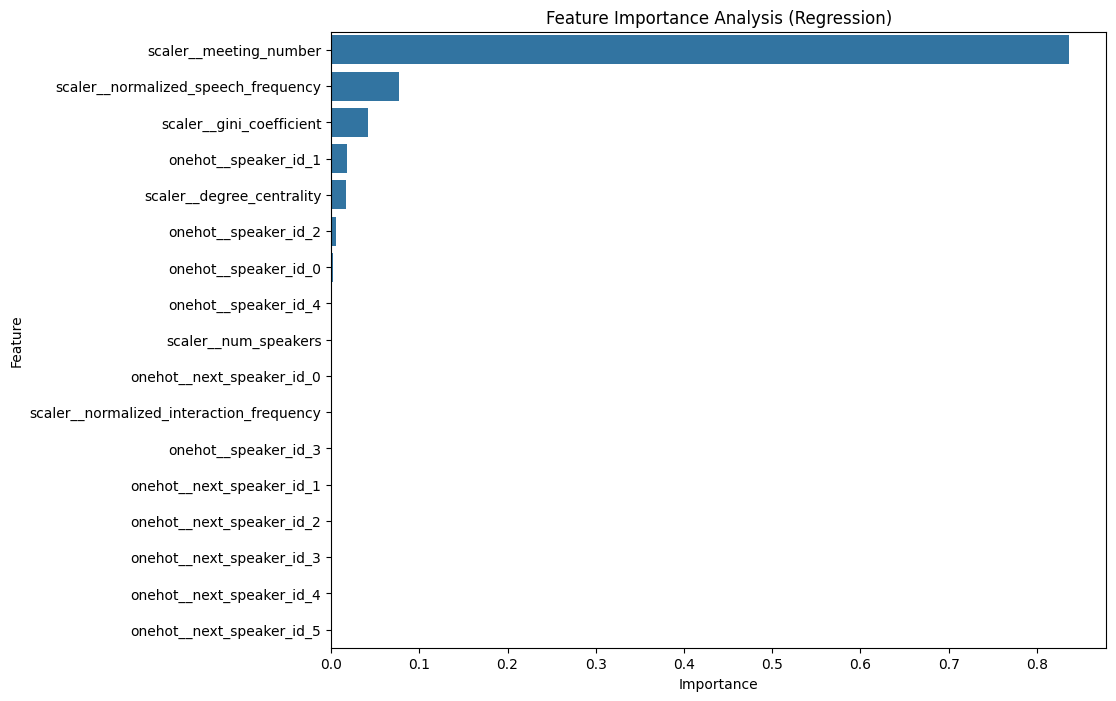

,Model,Parameters
0,Decision Tree,"max_depth: [3, 5, 7]"
1,Random Forest Regressor,"n_estimators: [50, 100, 150], max_depth: [5, 1..."
2,XGBRegressor,"n_estimators: [50, 100], max_depth: [3, 5, 7],..."
3,Gradient Boosting Regressor,"n_estimators: [50, 100], max_depth: [3, 5], le..."
4,K-Nearest Neighbors Regressor,"n_neighbors: [3, 5, 7]"
5,LightGBM Regressor,"n_estimators: [50, 100, 200], num_leaves: [31,..."
6,CatBoost Regressor,"iterations: [100, 200, 400], depth: [4, 6, 10]"
7,SVM Regressor,"C: [0.1, 1, 10], kernel: [linear, rbf]"


In [11]:
# Multicollinearity Check (VIF)
X_vif = pd.DataFrame(column_transformer.fit_transform(features), columns=column_transformer.get_feature_names_out())
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [round(variance_inflation_factor(X_vif.values, i), 2) for i in range(X_vif.shape[1])]

# Feature Importance
if hasattr(best_reg_model_info['model_object'].named_steps['model'], 'feature_importances_'):
    best_model = best_reg_model_info['model_object'].named_steps['model']
    feature_importances_reg = best_model.feature_importances_

    importance_df_reg = pd.DataFrame({'Feature': column_transformer.get_feature_names_out(), 'Importance': feature_importances_reg})
    importance_df_reg = importance_df_reg.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df_reg)
    plt.title('Feature Importance Analysis (Regression)')
    plt.savefig('feature_importance.png')
    plt.show()

# Model Performance Table
model_performance_df = pd.DataFrame(model_performance)

# Hyperparameter details
hyperparameter_details = [
    {'Model': 'Decision Tree', 'Parameters': 'max_depth: [3, 5, 7]'},
    {'Model': 'Random Forest Regressor', 'Parameters': 'n_estimators: [50, 100, 150], max_depth: [5, 10, 15]'},
    {'Model': 'XGBRegressor', 'Parameters': 'n_estimators: [50, 100], max_depth: [3, 5, 7], learning_rate: [0.01, 0.1, 0.2]'},
    {'Model': 'Gradient Boosting Regressor', 'Parameters': 'n_estimators: [50, 100], max_depth: [3, 5], learning_rate: [0.01, 0.1, 0.2, 0.5]'},
    {'Model': 'K-Nearest Neighbors Regressor', 'Parameters': 'n_neighbors: [3, 5, 7]'},
    {'Model': 'LightGBM Regressor', 'Parameters': 'n_estimators: [50, 100, 200], num_leaves: [31, 62], learning_rate: [0.01, 0.1, 0.3]'},
    {'Model': 'CatBoost Regressor', 'Parameters': 'iterations: [100, 200, 400], depth: [4, 6, 10]'},
    {'Model': 'SVM Regressor', 'Parameters': 'C: [0.1, 1, 10], kernel: [linear, rbf]'}
]

hyperparameter_df = pd.DataFrame(hyperparameter_details)
hyperparameter_df
